## 载入所需要的包

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 创建对象

### 通过传递一个list对象来创建一个Series，pandas会默认创建整型索引：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

### 通过传递一个numpy array，时间索引以及列标签来创建一个DataFrame：

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-05,-0.219312,-1.251797,0.891250,0.249234
2013-01-06,1.372908,0.300261,2.096987,-0.433615


### 通过传递一个能够被转换成类似序列结构的字典对象来创建一个DataFrame：

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'), 
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


### 查看不同列的数据类型：

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 如果你使用的是IPython，使用Tab自动补全功能会自动识别所有的属性以及自定义的列，下图中是所有能够被自动识别的属性的一个子集：

In [7]:
#df2.<TAB>

## 查看数据

### 查看frame中头部的行：

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-05,-0.219312,-1.251797,0.891250,0.249234


### 查看frame中尾部的行：

In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-05,-0.219312,-1.251797,0.891250,0.249234
2013-01-06,1.372908,0.300261,2.096987,-0.433615


###  显示索引、列和底层的numpy数据：

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[ 0.71157486, -1.21155342,  0.35855422, -0.23729442],
       [-0.31064162, -0.50677856,  0.41035943, -0.231321  ],
       [-0.75548411,  1.1344604 , -1.19361207, -0.64096992],
       [ 0.87208491, -0.95351351,  0.33874365, -0.00551953],
       [-0.21931227, -1.25179667,  0.89124956,  0.24923414],
       [ 1.37290816,  0.30026146,  2.09698698, -0.4336146 ]])

### describe()函数对于数据的快速统计汇总：

In [13]:
df.describe

<bound method DataFrame.describe of                    A         B         C         D
2013-01-01  0.711575 -1.211553  0.358554 -0.237294
2013-01-02 -0.310642 -0.506779  0.410359 -0.231321
2013-01-03 -0.755484  1.134460 -1.193612 -0.640970
2013-01-04  0.872085 -0.953514  0.338744 -0.005520
2013-01-05 -0.219312 -1.251797  0.891250  0.249234
2013-01-06  1.372908  0.300261  2.096987 -0.433615>

### 对数据的转置：

In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.711575,-0.310642,-0.755484,0.872085,-0.219312,1.372908
B,-1.211553,-0.506779,1.134460,-0.953514,-1.251797,0.300261
C,0.358554,0.410359,-1.193612,0.338744,0.891250,2.096987
D,-0.237294,-0.231321,-0.640970,-0.005520,0.249234,-0.433615


### 按轴进行排序:

In [15]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-05,-0.219312,-1.251797,0.891250,0.249234
2013-01-06,1.372908,0.300261,2.096987,-0.433615


In [16]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,-0.237294,0.358554,-1.211553,0.711575
2013-01-02,-0.231321,0.410359,-0.506779,-0.310642
2013-01-03,-0.640970,-1.193612,1.134460,-0.755484
2013-01-04,-0.005520,0.338744,-0.953514,0.872085
2013-01-05,0.249234,0.891250,-1.251797,-0.219312
2013-01-06,-0.433615,2.096987,0.300261,1.372908


### 按值进行排序:

In [17]:
df.sort(columns='B')

,A,B,C,D
2013-01-05,-0.219312,-1.251797,0.891250,0.249234
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-06,1.372908,0.300261,2.096987,-0.433615
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970


In [18]:
df.sort(columns='B',ascending=False)

,A,B,C,D
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970
2013-01-06,1.372908,0.300261,2.096987,-0.433615
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-05,-0.219312,-1.251797,0.891250,0.249234


## 选择

虽然标准的Python/Numpy的选择和设置表达式都能够直接派上用场，但是作为工程使用的代码，我们推荐使用经过优化的pandas数据访问方式： .at, .iat, .loc, .iloc 和 .ix

### 获取：

####  选择一个单独的列，这将会返回一个Series，等同于df.A：

In [19]:
df['A']

2013-01-01    0.711575
2013-01-02   -0.310642
2013-01-03   -0.755484
2013-01-04    0.872085
2013-01-05   -0.219312
2013-01-06    1.372908
Freq: D, Name: A, dtype: float64

#### 通过[]进行选择，这将会对行进行切片

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970
2013-01-04,0.872085,-0.953514,0.338744,-0.005520


### 通过标签选择

#### 使用标签来获取一个交叉的区域

In [22]:
df.loc[dates[0]]

A    0.711575
B   -1.211553
C    0.358554
D   -0.237294
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
dates[0]

Timestamp('2013-01-01 00:00:00', offset='D')

In [24]:
df.loc[dates[0],'A']

0.71157486207071097

In [25]:
df.loc[dates[0],'A':'B']

A    0.711575
B   -1.211553
Name: 2013-01-01 00:00:00, dtype: float64

####  通过标签来在多个轴上进行选择

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.711575,-1.211553
2013-01-02,-0.310642,-0.506779
2013-01-03,-0.755484,1.134460
2013-01-04,0.872085,-0.953514
2013-01-05,-0.219312,-1.251797
2013-01-06,1.372908,0.300261


#### 标签切片

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.310642,-0.506779
2013-01-03,-0.755484,1.134460
2013-01-04,0.872085,-0.953514


#### 对于返回的对象进行维度缩减

In [28]:
df.loc['20130102',['A','B']]

A   -0.310642
B   -0.506779
Name: 2013-01-02 00:00:00, dtype: float64

#### 获取一个标量

In [29]:
df.loc[dates[0],'A']

0.71157486207071097

#### 快速访问一个标量（与上一个方法等价）

In [30]:
df.at[dates[0],'A']

0.71157486207071097

### 通过位置选择 

#### 通过传递数值进行位置选择（选择的是行）

In [31]:
df.iloc[3]

A    0.872085
B   -0.953514
C    0.338744
D   -0.005520
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
df

,A,B,C,D
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-05,-0.219312,-1.251797,0.891250,0.249234
2013-01-06,1.372908,0.300261,2.096987,-0.433615


#### 通过数值进行切片，与numpy/python中的情况类似

In [33]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.872085,-0.953514
2013-01-05,-0.219312,-1.251797


In [34]:
df.iloc[3:6,0:2]

,A,B
2013-01-04,0.872085,-0.953514
2013-01-05,-0.219312,-1.251797
2013-01-06,1.372908,0.300261


#### 通过指定一个位置的列表，与numpy/python中的情况类似

In [35]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.310642,0.410359
2013-01-03,-0.755484,-1.193612
2013-01-05,-0.219312,0.891250


#### 对行进行切片

In [36]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970


#### 对列进行切片

In [37]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.211553,0.358554
2013-01-02,-0.506779,0.410359
2013-01-03,1.134460,-1.193612
2013-01-04,-0.953514,0.338744
2013-01-05,-1.251797,0.891250
2013-01-06,0.300261,2.096987


#### 获取特定的值

In [38]:
df.iloc[1,1]

-0.50677856425134393

In [39]:
df.iat[1,1]

-0.50677856425134393

### 布尔索引

#### 使用一个单独列的值来选择数据：

In [40]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.711575,-1.211553,0.358554,-0.237294
2013-01-04,0.872085,-0.953514,0.338744,-0.005520
2013-01-06,1.372908,0.300261,2.096987,-0.433615


#### 使用where操作来选择数据：

In [41]:
df[df > 0]

,A,B,C,D
2013-01-01,0.711575,NaN,0.358554,NaN
2013-01-02,NaN,NaN,0.410359,NaN
2013-01-03,NaN,1.134460,NaN,NaN
2013-01-04,0.872085,NaN,0.338744,NaN
2013-01-05,NaN,NaN,0.891250,0.249234
2013-01-06,1.372908,0.300261,2.096987,NaN


#### 使用isin()方法来过滤：

In [42]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.711575,-1.211553,0.358554,-0.237294,one
2013-01-02,-0.310642,-0.506779,0.410359,-0.231321,one
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970,two
2013-01-04,0.872085,-0.953514,0.338744,-0.005520,three
2013-01-05,-0.219312,-1.251797,0.891250,0.249234,four
2013-01-06,1.372908,0.300261,2.096987,-0.433615,three


In [43]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.755484,1.134460,-1.193612,-0.640970,two
2013-01-05,-0.219312,-1.251797,0.891250,0.249234,four


### 设置

#### 设置一个新的列：

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

#### 通过标签设置新的值：

In [46]:
df.at[dates[0],'A'] = 0

#### 通过位置设置新的值：

In [47]:
df.iat[0,1] = 0

#### 通过一个numpy数组设置一组新值：

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.358554,5,NaN
2013-01-02,-0.310642,-0.506779,0.410359,5,1
2013-01-03,-0.755484,1.134460,-1.193612,5,2
2013-01-04,0.872085,-0.953514,0.338744,5,3
2013-01-05,-0.219312,-1.251797,0.891250,5,4
2013-01-06,1.372908,0.300261,2.096987,5,5


#### 通过where操作来设置新的值：

In [49]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.358554,-5,NaN
2013-01-02,-0.310642,-0.506779,-0.410359,-5,-1
2013-01-03,-0.755484,-1.134460,-1.193612,-5,-2
2013-01-04,-0.872085,-0.953514,-0.338744,-5,-3
2013-01-05,-0.219312,-1.251797,-0.891250,-5,-4
2013-01-06,-1.372908,-0.300261,-2.096987,-5,-5


## 缺失值处理

在pandas中，使用np.nan来代替缺失值，这些值将默认不会包含在计算中

### reindex()方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝：

In [50]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.358554,5,NaN,1
2013-01-02,-0.310642,-0.506779,0.410359,5,1,1
2013-01-03,-0.755484,1.134460,-1.193612,5,2,NaN
2013-01-04,0.872085,-0.953514,0.338744,5,3,NaN


### 去掉包含缺失值的行：

In [51]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.310642,-0.506779,0.410359,5,1,1


### 对缺失值进行填充：

In [52]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.358554,5,5,1
2013-01-02,-0.310642,-0.506779,0.410359,5,1,1
2013-01-03,-0.755484,1.134460,-1.193612,5,2,5
2013-01-04,0.872085,-0.953514,0.338744,5,3,5


### 对数据进行布尔填充：

In [53]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 相关操作

### 统计（相关操作通常情况下不包括缺失值）

#### 执行描述性统计：

In [54]:
df.mean()

A    0.159926
B   -0.212894
C    0.483714
D    5.000000
F    3.000000
dtype: float64

#### 在其他轴上进行相同的操作：

In [55]:
df.mean(1)

2013-01-01    1.339639
2013-01-02    1.118588
2013-01-03    1.237073
2013-01-04    1.651463
2013-01-05    1.684028
2013-01-06    2.754031
Freq: D, dtype: float64

#### 对于拥有不同维度，需要对齐的对象进行操作。Pandas会自动的沿着指定的维度进行广播：

In [56]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.755484,0.134460,-2.193612,4,1
2013-01-04,-2.127915,-3.953514,-2.661256,2,0
2013-01-05,-5.219312,-6.251797,-4.108750,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

#### 对数据应用函数：

In [57]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.358554,5,NaN
2013-01-02,-0.310642,-0.506779,0.768914,10,1
2013-01-03,-1.066126,0.627682,-0.424698,15,3
2013-01-04,-0.194041,-0.325832,-0.085955,20,6
2013-01-05,-0.413353,-1.577628,0.805295,25,10
2013-01-06,0.959555,-1.277367,2.902282,30,15


In [58]:
df.apply(lambda x: x.max() - x.min())

A    2.128392
B    2.386257
C    3.290599
D    0.000000
F    4.000000
dtype: float64

#### 直方图

In [59]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    0
2    1
3    6
4    3
5    3
6    5
7    6
8    6
9    4
dtype: int32

In [60]:
s.value_counts()

6    3
3    2
0    2
5    1
4    1
1    1
dtype: int64

#### 字符串方法

Series对象在其str属性中配备了一组字符串处理方法，可以很容易的应用到数组中的每个元素，如下段代码所示。

In [61]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并

Pandas提供了大量的方法能够轻松的对Series，DataFrame和Panel对象进行各种符合各种逻辑关系的合并操作。

#### Concat

In [62]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.279279,0.180558,0.386619,0.625214
1,-0.088069,0.546669,1.034073,0.034361
2,0.861665,-0.866921,0.634945,-0.684527
3,0.245769,0.383954,-0.855036,-0.169980
4,-0.321547,-0.484585,-0.597604,1.701307
5,-1.155895,0.774858,-1.486171,-0.563323
6,-0.888158,0.075583,-0.741362,-0.359007
7,0.436940,0.449416,-0.555402,-0.325893
8,1.327024,2.471745,1.256307,-0.360362
9,0.829699,-1.429902,0.536993,-0.001288


In [63]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.279279,0.180558,0.386619,0.625214
1,-0.088069,0.546669,1.034073,0.034361
2,0.861665,-0.866921,0.634945,-0.684527
3,0.245769,0.383954,-0.855036,-0.169980
4,-0.321547,-0.484585,-0.597604,1.701307
5,-1.155895,0.774858,-1.486171,-0.563323
6,-0.888158,0.075583,-0.741362,-0.359007
7,0.436940,0.449416,-0.555402,-0.325893
8,1.327024,2.471745,1.256307,-0.360362
9,0.829699,-1.429902,0.536993,-0.001288


####  Join  类似于SQL类型的合并

In [64]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [65]:
left

,key,lval
0,foo,1
1,foo,2


In [66]:
right

,key,rval
0,foo,4
1,foo,5


In [67]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Append 将一行连接到一个DataFrame上

In [68]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.756348,-0.293615,0.200247,0.616458
1,-0.649353,-0.208109,0.457505,0.162329
2,0.043076,-0.077769,1.267287,-0.781646
3,1.369460,-0.008021,-1.878691,-0.400657
4,1.008573,-1.391996,0.524837,0.725293
5,1.567660,0.119115,0.699930,-1.503744
6,-0.269038,0.661428,-0.129623,-2.065763
7,0.079450,-0.379063,-0.544748,1.782967


In [69]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.756348,-0.293615,0.200247,0.616458
1,-0.649353,-0.208109,0.457505,0.162329
2,0.043076,-0.077769,1.267287,-0.781646
3,1.369460,-0.008021,-1.878691,-0.400657
4,1.008573,-1.391996,0.524837,0.725293
5,1.567660,0.119115,0.699930,-1.503744
6,-0.269038,0.661428,-0.129623,-2.065763
7,0.079450,-0.379063,-0.544748,1.782967
8,1.369460,-0.008021,-1.878691,-0.400657


## 分组

对于”group by”操作，我们通常是指以下一个或多个操作步骤：
+ （Splitting）按照一些规则将数据分为不同的组；  
+ （Applying）对于每组数据分别执行一个函数；  
+ （Combining）将结果组合到一个数据结构中；  

In [70]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.293771,-0.720084
1,bar,one,-0.091618,-0.242786
2,foo,two,0.325666,-0.901426
3,bar,three,-0.044353,-0.483983
4,foo,two,1.135333,0.516123
5,bar,two,1.530453,0.672563
6,foo,one,-0.715756,-1.755726
7,foo,three,0.950859,-1.076111


+ 分组并对每个分组执行sum函数：

In [71]:
df.groupby('A').sum()

,C,D
A,,
bar,1.394482,-0.054206
foo,2.989874,-3.937225


+ 通过多个列进行分组形成一个层次索引，然后执行函数：

In [72]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.091618 -0.242786
    three -0.044353 -0.483983
    two    1.530453  0.672563
foo one    0.578015 -2.475810
    three  0.950859 -1.076111
    two    1.460999 -0.385303

## Reshaping

### Stack

In [73]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.264520 -0.279295
      two    -0.583701 -0.682053
baz   one    -0.412274 -0.842205
      two    -1.165303 -0.764369

In [74]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.264520
               B   -0.279295
       two     A   -0.583701
               B   -0.682053
baz    one     A   -0.412274
               B   -0.842205
       two     A   -1.165303
               B   -0.764369
dtype: float64

In [75]:
stacked.unstack()

A         B
first second                    
bar   one    -1.264520 -0.279295
      two    -0.583701 -0.682053
baz   one    -0.412274 -0.842205
      two    -1.165303 -0.764369

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.264520 -0.583701
      B -0.279295 -0.682053
baz   A -0.412274 -1.165303
      B -0.842205 -0.764369

In [77]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.264520 -0.412274
       B -0.279295 -0.842205
two    A -0.583701 -1.165303
       B -0.682053 -0.764369

## 数据透视表

In [78]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.078707,-0.111276
1,one,B,foo,0.226962,0.343351
2,two,C,foo,0.486200,0.032572
3,three,A,bar,0.011161,-0.643604
4,one,B,bar,-0.262087,-0.573132
5,one,C,bar,-0.080930,0.523806
6,two,A,foo,0.491476,-1.108970
7,three,B,foo,-1.736186,0.359835
8,one,C,foo,0.214368,-0.822669
9,one,A,bar,0.026015,0.951521


In [79]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.026015 -0.078707
      B -0.262087  0.226962
      C -0.080930  0.214368
three A  0.011161       NaN
      B       NaN -1.736186
      C -1.811130       NaN
two   A       NaN  0.491476
      B -0.110989       NaN
      C       NaN  0.486200

## 时间序列

Pandas在对频率转换进行重新采样时拥有简单、强大且高效的功能（如将按秒采样的数据转换为按5分钟为单位进行采样的数据）。这种操作在金融领域非常常见。

In [80]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min', how='sum')

2012-01-01    23709
Freq: 5T, dtype: int32

### 时区表示：

In [81]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.657310
2012-03-07    1.489756
2012-03-08   -1.765853
2012-03-09   -0.353211
2012-03-10    2.459322
Freq: D, dtype: float64

In [82]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.657310
2012-03-07 00:00:00+00:00    1.489756
2012-03-08 00:00:00+00:00   -1.765853
2012-03-09 00:00:00+00:00   -0.353211
2012-03-10 00:00:00+00:00    2.459322
Freq: D, dtype: float64

### 时区转换：

In [83]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.657310
2012-03-06 19:00:00-05:00    1.489756
2012-03-07 19:00:00-05:00   -1.765853
2012-03-08 19:00:00-05:00   -0.353211
2012-03-09 19:00:00-05:00    2.459322
Freq: D, dtype: float64

### 时间跨度转换：

In [84]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.277223
2012-02-29    0.256514
2012-03-31    0.289290
2012-04-30   -0.979247
2012-05-31    0.008911
Freq: M, dtype: float64

### 时期和时间戳之间的转换使得可以使用一些方便的算术函数。

In [85]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.475207
1990-06-01 09:00    2.582873
1990-09-01 09:00   -1.144344
1990-12-01 09:00   -1.062088
1991-03-01 09:00   -1.134094
Freq: H, dtype: float64

## Categorical

### 从0.15版本开始，pandas可以在DataFrame中支持Categorical类型的数据

In [86]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

### 将原始的grade转换为Categorical数据类型：

In [87]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

### 将Categorical类型数据重命名为更有意义的名称：

In [88]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

### 对类别进行重新排序，增加缺失的类别：

In [89]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

### 排序是按照Categorical的顺序进行的而不是按照字典顺序进行：

In [90]:
df.sort("grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### 对Categorical列进行排序时存在空的类别：

In [91]:
df.groupby("grade").size()

grade
very bad      1
bad         NaN
medium      NaN
good          2
very good     3
dtype: float64

## 画图

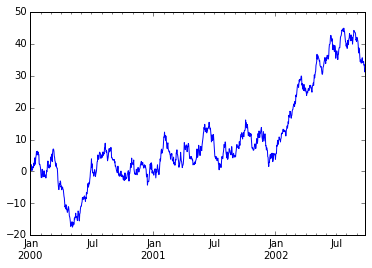

In [92]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

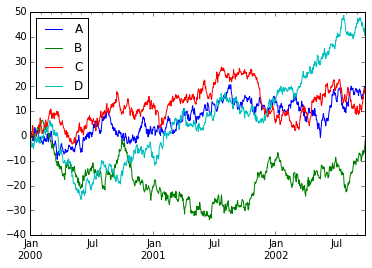

In [93]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();
df.plot(); 
plt.legend(loc='best')

## 导入和保存数据

### csv

#### 写入csv文件：

In [94]:
df.to_csv('foo.csv')

#### 从csv文件中读取：

In [95]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.104979,0.768088,-0.150508,-0.682000
1,2000-01-02,1.907973,-0.211171,-0.903131,-1.637864
2,2000-01-03,1.403982,-0.406193,-0.471406,-1.931604
3,2000-01-04,0.673185,-0.737296,0.121869,-4.445783
4,2000-01-05,0.534309,-0.607407,0.281194,-3.954126
5,2000-01-06,0.481747,0.274807,1.286739,-3.802834
6,2000-01-07,-0.507148,0.448861,4.186632,-4.271302
7,2000-01-08,-1.383924,0.696812,3.898944,-2.967221
8,2000-01-09,-2.030452,0.442700,2.992836,-4.489583
9,2000-01-10,-0.795996,1.059102,0.947625,-5.019095


### HDF5

#### 写入HDF5存储：

In [96]:
df.to_hdf('foo.h5','df')

ImportError: HDFStore requires PyTables, "No module named 'tables'" problem importing

#### 从HDF5存储中读取：

In [ ]:
pd.read_hdf('foo.h5','df')

### excel

#### 写入excel文件：

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

#### 从excel中读取：

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

## 参考内容
+ http://pandas.pydata.org/pandas-docs/stable/10min.html  
+ http://www.cnblogs.com/chaosimple/p/4153083.html  